# Data Driven Modeling
### (Theme of this semester: CODING AS LITERACY)
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />
### PhD seminar series at Chair for Computer Aided Architectural Design (CAAD), ETH Zurich


###### <a href=https://vahidmoosavi.com/> Vahid Moosavi </a>
<hr style="height:1px;border:none;color:stillblue;background-color:black;" />

<a></a>

# First Session: Introduction 
<hr style="height:1px;border:none;color:stillblue;background-color:steelblue;" />
<hr style="height:1px;border:none;color:stillblue;background-color:black;" />

<span style="color:steelblue;font-size: 1em;"> 28th February 2017</span>

# What do I mean by "Modeling"?

<a></a>
## Formally speaking...
image=/Images/RosenModel.png
<img src="files/Images/RosenModel.png"width =700, height=700/>
### <a></a>

<hr style="height:3px;border:none;color:stillblue;background-color:black;" />


## Why Data Driven Modeling and what is Coding as Literacy? 

<hr style="height:3px;border:none;color:steelblue;background-color:black;" />

<img src="files/Images/Theory_Data_Modeling1.png"width =600, height=600/>


# They are not opposing each other

<hr style="height:3px;border:none;color:steelblue;background-color:black;" />

<img src="files/Images/DDMTDM.png"width =400, height=400/>


# This literacy will turn the classical notion of expertise as 

<span style="color:steelblue;font-size: 2.5em;line-height: 100%;">“Having the Answers to the Known Questions”  </span>

# to
<span style="color:steelblue;font-size: 2.5em;line-height: 100%;">“Learning to Ask Good Questions”</span> 


### <a></a>
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />
# But now how to learn this  if it is like a new language?





## This is how I framed it few months ago...

<img src="files/Images/DataDrivenModelingElements.png"width =600, height=600/>


# With different approaches?
## Resource Based --> Forward but slow and might take a BSc.
## Market Oriented --> Backward, following the fashion: itmight work, but mostly we get simply puzzled
## Connecting the dots in a guided path --- Wiki-based approach


<a></a>
<img src="files/Images/DataDrivenModelingKW.png"width =600, height=600/>

# But now I prefer this more as my own image of the field...
### Green color indicates we previously discussed the topic to an extent.
<a></a>
<img src="files/Images/KW2016_1.png"width =600, height=600/>


# This semester I would like to offer two scenarios:
# 1- Discussions on algorithms and their implementations

* **Theories**
    * Convolutional Neural Networks
    * Recurrent Neural Networks
    * Ensemble Models
    * Resampling and Data Completion 
    * Dimensionality Reduction and Topological Data Analysis
    * How to compare objects? On similarity measures
    * Intro to Reinforcement Learning
    * Support Vector Machines


# 2- Workshop style sessions around applications




* **Applications**
    * Image Modeling: Big Data and Urban Design 
    * Time Series Analysis and Forecasting
    * Text Modeling and sentiment analysis
    * Real Estate Market 
    * Traffic Modeling 
    * Urban Air pollution modeling
    * Water flow Emulations
    * Analyzing Food Recipes 


* **Data Wrangling with Pandas** 
* **Data Collection and use of APIs**
* **Web Application Development**


* **Frameworks to be used**
    * Scikit-learn: Classical Machine Learning
    * Gensim: Text Modeling
    * Tensorflow: Deep Learning
    * Flask: Web Application Framework
    * BS4: HTML Parsing
    * Leaflet: Geo Mapping
    


<hr style="height:3px;border:none;color:steelblue;background-color:red;" />

# Back to the original idea of coding as litercy



# Does it make sense to use data driven modeling if we have a valid descriptive theory or an explicit logic of a phenomenon?
## This seems silly!
## But, as we can see in the following example, we can solve logical games without explicit implementation of the logic of the game.
<hr style="height:3px;border:none;color:steelblue;background-color:black;" />

<img src="files/Images/DDMTDM.png"width =300, height=300/>

## A very funny intro to TensorFlow and Machine Learning for the logical game of fizzbuzz!
http://joelgrus.com/2016/05/23/fizz-buzz-in-tensorflow/

In [107]:
import numpy as np
import tensorflow as tf

In [108]:
def binary_encode(i, num_digits):
    return np.array([i >> d & 1 for d in range(num_digits)][::-1])

In [109]:
binary_encode(9,10)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [110]:
def fizz_buzz_encode(i):
    if   i % 15 == 0: return np.array([0, 0, 0, 1])
    elif i % 5  == 0: return np.array([0, 0, 1, 0])
    elif i % 3  == 0: return np.array([0, 1, 0, 0])
    else:             return np.array([1, 0, 0, 0])
    

In [142]:
NUM_DIGITS = 11
test_number = 200
trX = np.array([binary_encode(i, NUM_DIGITS) for i in range(test_number+1, 2 ** NUM_DIGITS)])
trY = np.array([fizz_buzz_encode(i) for i in range(test_number+1, 2 ** NUM_DIGITS)])

In [143]:
NUM_HIDDEN = 400

In [144]:
X = tf.placeholder("float", [None, NUM_DIGITS])
Y = tf.placeholder("float", [None, 4])

In [145]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

w_h = init_weights([NUM_DIGITS, NUM_HIDDEN])
w_o = init_weights([NUM_HIDDEN, 4])

In [146]:
print w_h.get_shape()
print w_o.get_shape()

(11, 400)
(400, 4)


In [147]:
def model(X, w_h, w_o):
    h = tf.nn.relu(tf.matmul(X, w_h))
    return tf.matmul(h, w_o)

In [151]:
py_x = model(X, w_h, w_o)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(py_x, Y))
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost)

In [152]:
predict_op = tf.argmax(py_x, 1)

In [153]:
def fizz_buzz(i, prediction):
    return [str(i), "fizz", "buzz", "fizzbuzz"][prediction]

In [157]:
BATCH_SIZE = 128

# Launch the graph in a session
with tf.Session() as sess:
    tf.global_variables_initializer().run()

    for epoch in range(10000):
        # Shuffle the data before each training iteration.
        p = np.random.permutation(range(len(trX)))
        trX, trY = trX[p], trY[p]

        # Train in batches of 128 inputs.
        for start in range(0, len(trX), BATCH_SIZE):
            end = start + BATCH_SIZE
            sess.run(train_op, feed_dict={X: trX[start:end], Y: trY[start:end]})

        # And print the current accuracy on the training data.
        if epoch%500 ==0:
            print(epoch, np.mean(np.argmax(trY, axis=1) ==
                             sess.run(predict_op, feed_dict={X: trX, Y: trY})))

    # And now for some fizz buzz
    numbers = np.arange(1, test_number)
    teX = np.transpose(binary_encode(numbers, NUM_DIGITS))
    pred_label = sess.run(predict_op, feed_dict={X: teX})
    output = np.vectorize(fizz_buzz)(numbers, pred_label)
    


(0, 0.53329723876556578)
(500, 0.57011369788846777)
(1000, 0.92528424472116944)
(1500, 0.9821331889550623)
(2000, 0.99133730373578777)
(2500, 0.99891716296697342)
(3000, 1.0)
(3500, 1.0)
(4000, 1.0)
(4500, 1.0)
(5000, 1.0)
(5500, 1.0)
(6000, 1.0)
(6500, 1.0)
(7000, 1.0)
(7500, 1.0)
(8000, 1.0)
(8500, 1.0)
(9000, 1.0)
(9500, 1.0)


In [158]:
def setlabel(i):
    if   i % 15 == 0: return 3
    elif i % 5  == 0: return 2
    elif i % 3  == 0: return 1
    else:             return 0
numbers = np.arange(1, test_number)
correct_label = np.vectorize(setlabel)(numbers)
correct_label

array([0, 0, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 3, 0, 0, 1, 0, 2, 1, 0, 0,
       1, 2, 0, 1, 0, 0, 3, 0, 0, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 3, 0,
       0, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 3, 0, 0, 1, 0, 2, 1, 0, 0, 1,
       2, 0, 1, 0, 0, 3, 0, 0, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 3, 0, 0,
       1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 3, 0, 0, 1, 0, 2, 1, 0, 0, 1, 2,
       0, 1, 0, 0, 3, 0, 0, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 3, 0, 0, 1,
       0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 3, 0, 0, 1, 0, 2, 1, 0, 0, 1, 2, 0,
       1, 0, 0, 3, 0, 0, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 3, 0, 0, 1, 0,
       2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 3, 0, 0, 1, 0])

In [170]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

%matplotlib inline
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    font = {'size'   : 8}
    plt.rc('font', **font)



Confusion matrix, without normalization
[[106   1   0   0]
 [  0  53   0   0]
 [  0   0  26   0]
 [  0   1   0  12]]


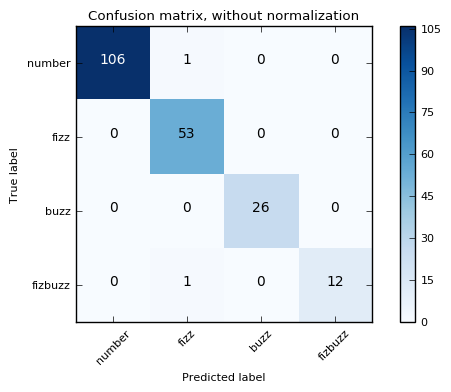

In [171]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(correct_label, pred_label)
np.set_printoptions(precision=1)
class_names = ['number','fizz','buzz','fizbuzz']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()